<a href="https://colab.research.google.com/github/snaby/project1/blob/master/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
import scipy.stats as stats
from scipy.optimize import newton

In [ ]:
def dynamics_solve(f, D = 1, t_0 = 0.0, s_0 = 1, h = 0.1, N = 100, method = "Euler"):
    
    """ Solves for dynamics of a given dynamical system
    
    - User must specify dimension D of phase space.
    - Includes Euler, RK2, RK4, that user can choose from using the keyword "method"
    
    Args:
        f: A python function f(t, s) that assigns a float to each time and state representing
        the time derivative of the state at that time.
        
    Kwargs:
        D: Phase space dimension (int) set to 1 as default
        t_0: Initial time (float) set to 0.0 as default
        s_0: Initial state (float for D=1, ndarray for D>1) set to 1.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        method: Numerical method (string), can be "Euler", "RK2", "RK4"
    
    Returns:
        T: Numpy array of times
        S: Numpy array of states at the times given in T
    """
    
    T = np.array([t_0 + n * h for n in range(N + 1)])
    
    if D == 1:
        S = np.zeros(N + 1)
    
    if D > 1:
        S = np.zeros((N + 1, D))
        
    S[0] = s_0
    
    if method == 'Euler':
        for n in range(N):
            S[n + 1] = S[n] + h * f(T[n], S[n])
    
    if method == 'RK2':
        for n in range(N):
            k1 = h * f(T[n], S[n])
            k2 = h * f(T[n]+1/2*h, S[n]+1/2*k1)
            S[n + 1] = S[n] + k2
    
    if method == 'RK4':
        for n in range(N):
            k1 = h * f(T[n], S[n])
            k2 = h * f(T[n]+1/2*h, S[n]+1/2*k1)
            k3 = h * f(T[n]+1/2*h, S[n]+1/2*k2)
            k4 = h * f(T[n]+h, S[n] + k3)
            S[n + 1] = S[n] + 1/6*(k1+2*k2+2*k3+k4)
            
    return T, S

def hamiltonian_solve(d_qH, d_pH, d = 1, t_0 = 0.0, q_0 = 0.0, p_0 = 1.0, h = 0.1, N = 100, method = "Euler",):
    
    """ Solves for dynamics of Hamiltonian system
    
    - User must specify dimension d of configuration space.
    - Includes Euler, RK2, RK4, Symplectic Euler (SE) and Stormer Verlet (SV) 
      that user can choose from using the keyword "method"
    
    Args:
        d_qH: Partial derivative of the Hamiltonian with respect to coordinates (float for d=1, ndarray for d>1)
        d_pH: Partial derivative of the Hamiltonian with respect to momenta (float for d=1, ndarray for d>1)
        
    Kwargs:
        d: Spatial dimension (int) set to 1 as default
        t_0: Initial time (float) set to 0.0 as default
        q_0: Initial position (float for d=1, ndarray for d>1) set to 0.0 as default
        p_0: Initial momentum (float for d=1, ndarray for d>1) set to 1.0 as default
        h: Step size (float) set to 0.1 as default
        N: Number of steps (int) set to 100 as default
        method: Numerical method (string), can be "Euler", "RK2", "RK4", "SE", "SV"
    
    Returns:
        T: Numpy array of times
        Q: Numpy array of positions at the times given in T
        P: Numpy array of momenta at the times given in T
    """
    T = np.array([t_0 + n * h for n in range(N + 1)])
    
    if d == 1:
        P =  np.zeros(N + 1)
        Q =  np.zeros(N + 1)
        
    
    if d > 1:
        P=np.zeros((N + 1, d))
        Q=np.zeros((N + 1, d))
   
    Q[0] = q_0
    P[0] = p_0    
        
    if method == 'Euler':
        for n in range(N):
            Q[n + 1] = Q[n] + h * d_pH(Q[n], P[n])
            P[n + 1] = P[n] - h *d_qH(Q[n],P[n])
    
    if method == 'RK2':
        for n in range(N):
            k1_Q = h * d_pH(Q[n], P[n])
            k1_P = h * (- d_qH(Q[n], P[n]))
            
            k2_Q = h * d_pH(Q[n]+k1_Q*0.5, P[n]+0.5*k1_P)
            k2_P = - h * d_qH(Q[n]+0.5*k1_Q, P[n]+0.5*k1_P)
            
            Q[n + 1] = Q[n] + k2_Q
            P[n + 1] = P[n] + k2_P
        
    if method == 'RK4':
        for n in range(N): 
            k1_Q = h * d_pH(Q[n], P[n])
            k1_P = - h * d_qH(Q[n], P[n])
            k2_Q = h * d_pH(Q[n]+0.5*k1_Q, P[n]+0.5*k1_P)
            k2_P = -h * d_qH(Q[n]+0.5*k1_Q, P[n]+0.5*k1_P)
            k3_Q = h * d_pH(Q[n]+0.5*k2_Q, P[n]+0.5*k2_P)
            k3_P = - h * d_qH(Q[n]+0.5*k2_Q, P[n]+0.5*k2_P)
            k4_Q= h * d_pH(Q[n]+k3_Q, P[n] + k3_P)
            k4_P= - h * d_qH(Q[n]+k3_Q, P[n] + k3_P)
            Q[n + 1] = Q[n] + 1/6*(k1_Q+2*k2_Q+2*k3_Q+k4_Q)
            P[n + 1] = P[n] + 1/6*(k1_P+2*k2_P+2*k3_P+k4_P)
        
    if method == 'SE':
        for n in range(N):
            Q[n + 1] = Q[n] + h * d_pH(Q[n], P[n])
            P[n + 1] = P[n] - h *d_qH(Q[n+1],P[n])
    
    if method == "SV":
        for n in range(N):
          p_temp= P[n]-0.5*h*d_qH(Q[n],P[n])
          Q[n+1]=Q[n]+h*d_pH(Q[n],p_temp)
          P[n+1]=p_temp-0.5*h*d_qH(Q[n+1],P[n])
        
    return T, Q, P

# Function tests

Describe first the suite of tests you intend to do to ensure that your functions are working properly, then in code cells below, execute the tests, and comment on how you know the tests were passed.

## Basic Population Model

To test dynamics_solve we will take the population model problem 
$$ \dot{P}(t) = (B-D)P(t) \hspace{1cm} P(0)=P_0$$
In this case we know the general solution is 
$$ P(t) = P_0e^{(B-D)t}$$
From this we see that the "natural" time scale is $T=1/|B-D|$. After a time T the population falls or grows (depending on the sign) by a factor of e. A time-step is sufficiently small as long as it is much smaller than T.  

In the code cell below there are two sets of plots. In the first row we plot the numerical and analytic solutions against each other for each of the three methods given $P_0=100$, $B=20$, and $D=25$ for a total time of length $3T$ with 500 time steps. As seen in the plots, the numerical and analytic solutions are indistinguishable for this many time steps (about 500/3 per characteristic time interval).  

For the second row of plots we maintain the values of $P_0$, $B$, $D$, and total time, but vary time step from 50 to 500 in steps of 50. For each time step and for each method the global truncation error at the last time step is computed. We then normalized the time step array to 50 and normalized the global truncation errors in each method to their value at time step 50, and plotted the logarithms of these arrays for each method. The slope of these lines are then computed and represent the order of the method. These slopes and corresponding fit r-values are given in the plot. As shown in these figures, Euler is first-order, RK2 is second-order, and RK4 is fourth-order with r-values of basically 1. 


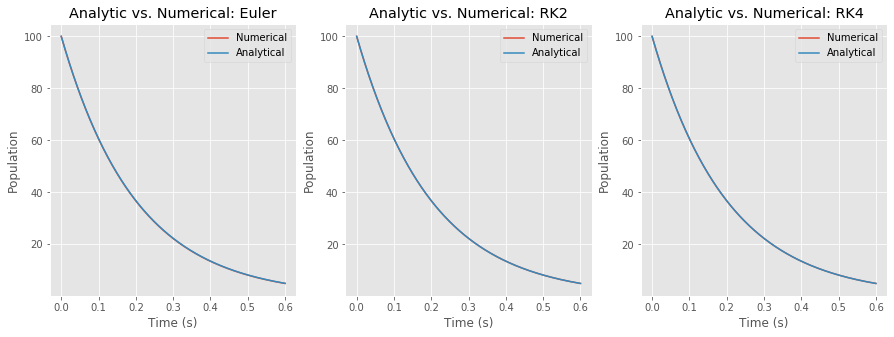

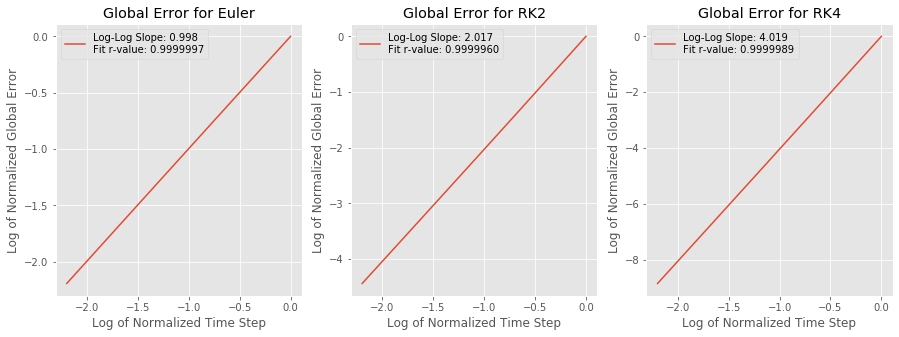

In [ ]:
def popmodel(B,D):
  def inner_function(t,s):
    return (B-D)*s
  return inner_function

def compare_to_analytic(B, D, P0, final_time_normalized, Nsteps, solver):
  Tnum, Snum = dynamics_solve(popmodel(B, D), D=1, t_0=0.0, s_0=P0, h=final_time_normalized*abs(1/(B-D))/Nsteps, N=Nsteps, method=solver)
  Sanalytic = P0*np.exp((B-D)*Tnum)
  
  return Tnum, Snum, Sanalytic

Tnum, Snum, Sanalytic = [], [], []

for i, method in enumerate(['Euler', 'RK2', 'RK4']):
  T, Sn, Sa = compare_to_analytic(20, 25, 100, 3, 500, method)
  Tnum.append(T)
  Snum.append(Sn)
  Sanalytic.append(Sa)
  
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for i, this_ax in enumerate(ax):
  this_ax.plot(Tnum[i], Snum[i])
  this_ax.plot(Tnum[i], Sanalytic[i])
  this_ax.set_title(['Analytic vs. Numerical: Euler', 'Analytic vs. Numerical: RK2', 'Analytic vs. Numerical: RK4'][i])
  this_ax.set_xlabel('Time (s)')
  this_ax.set_ylabel('Population')
  this_ax.legend(['Numerical','Analytical'])
  
dynamics_solve(popmodel(20,25), D = 1, t_0 = 0.0, s_0 = 1, h = 0.1, N = 100, method = "Euler")

T,S=dynamics_solve(popmodel(20,25), D = 1, t_0 = 0.0, s_0 = 1, h = 0.1, N = 100, method = "Euler")


def popsolution(t,B,D):
  return P0*(np.exp((B-D)*t))

time_step_arr=np.arange(50,500,50)

GlobalErr=[]

for i, method in enumerate(['Euler','RK2','RK4']):
  current_err=[]
  for j in time_step_arr:
    T, Sn, Sa = compare_to_analytic(20, 25, 100, 3, j, method)
    err=np.abs(Sa[-1]-Sn[-1])
    current_err.append(err)
  GlobalErr.append(current_err)
#print(len(GlobalErr[0]))

fig, ax=plt.subplots(1,3, figsize=(15,5))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i, this_ax in enumerate(ax):
  this_ax.plot(np.log(3*1/time_step_arr/np.abs(20-25)/(3*1/time_step_arr[0]/np.abs(20-25))), np.log(GlobalErr[i]/GlobalErr[i][0]))
  this_ax.set_title(['Global Error for Euler', 'Global Error for RK2', 'Global Error for RK4'][i])
  this_ax.set_xlabel('Log of Normalized Time Step')
  this_ax.set_ylabel('Log of Normalized Global Error')
  slope=stats.linregress(np.log(3*1/time_step_arr/np.abs(20-25)/(3*1/time_step_arr[0]/np.abs(20-25))), np.log(GlobalErr[i]/GlobalErr[i][0]))
  this_ax.legend([f'Log-Log Slope: {slope.slope:.3f}\nFit r-value: {slope.rvalue:.7f}'])
  

# A More General Population Model #

We consider now the differential equation 
$$ \dot{P}(t) = f(t, P(t)) = R\left(1-\frac{P}{K}\right)P$$

1). The function has two roots, where $P=K$ and where $P=0$. If at a given time P is one of these values, the population number will not change from its value at that moment in time. 

2). If P is in the open interval (0, K), then f is the same sign as R. Assuming R is positive, this implies exponential growth. If R is negative, this implies exponential decay. 

3). If P is in the open interval (K, $\infty$), then f has the opposite sign of R. Then the cases listed in 2 will simply be reversed. 

4). For the following initial conditions:

a). If $P_0=0$, the population does not change because $\dot{P}$ is zero. 

b). If $P_0$ is between 0 and K, then the growth rate starts as the sign of R (assume positive), at which point P grows until it surpasses K at which point it starts to shrink, and so on, asymptotically approaching K. 

c). If $P_0=K$, the population does not change again because $\dot{P}$ is zero.

d). If $P_0>K$, the population initially shrinks until it falls below K, at which point it starts to grow, and so on, asymptotically approaching K again. 

5). K can be interpreted as a carrying capacity, the maximal population that can be sustainably supported in the system. 

6). See plots in coding cell below. The roots are seen to be at 0 and $10^6$, ie 0 and K, as expected. 

Text(0, 0.5, 'Population Rate of Change (mil/time)')

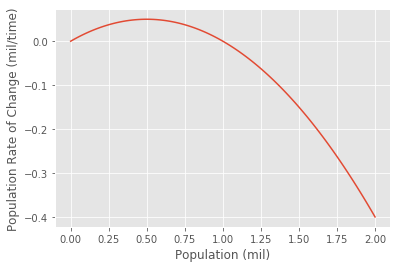

In [ ]:
fig, ax = plt.subplots()

R = 0.2 
K = 1e6
Prange = np.linspace(0, 2e6, 100)

f = lambda t, P: R*(1-P/K)*P

ax.plot(Prange/1e6, f(0, Prange)/1e6)
ax.set_xlabel('Population (mil)')
ax.set_ylabel('Population Rate of Change (mil/time)')

Text(0, 0.5, 'Population')

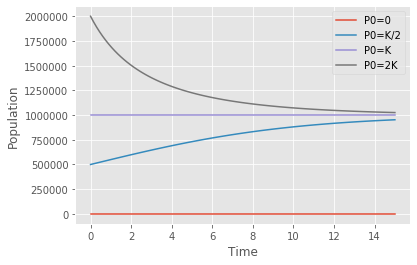

In [ ]:
R=0.2
K=1e6
f = lambda t, P: R*(1-P/K)*P

def run_solver(P0, final_time_normalized, Nsteps=100, solver='RK4'):
  Tnum, Snum = dynamics_solve(f, D=1, t_0=0.0, s_0=P0, h=1/(R*Nsteps)*final_time_normalized, N=Nsteps, method=solver)
  return Tnum,Snum

fig, ax =plt.subplots()

four_cases=[0,K/2,K,2*K]

for i in four_cases:
  Tnum,Snum= run_solver(i, 3)
  ax.plot(Tnum, Snum)
ax.legend(["P0=0","P0=K/2","P0=K","P0=2K"])
ax.set_xlabel("Time")
ax.set_ylabel("Population")


Our prediction was right in the fact that we expected it to grow or decay to the carrying capacity but we did not see any overshoot or undershoot of the carrying capactiy and no oscillations about K. 

# An even more general population model #

We now consider the population model 
$$ f(t,P) = R\left(1-\frac{P}{K}\right)P-C\frac{P^2}{P_c^2+P^2}$$

1/2). We will consider R=0.2, K=1000, C=40, $P_c=100$.  See code cell below for a plot. The function has four roots between 0 and 1000. 

3). See first coding cell, the newton method is imported. See below coding cell for implementation. The roots are found to be at 0, 68.3375, 200, and 731.6625. 

4). Assuming we can ignore the negative part of the real line, the four regions are (0, 68.3375), (68.3375, 200), (200, 731.6625), and (732.6625, $\infty$).

5)For the Region 1, we predict that we grow and grow until we reach 68.3375 but then we come to a stop. In Region 2, we predict that the population will decrease back to 68.3375. In Region 3, we predict that our population will grow to 200 and then come to a stop. In region 4, we predict that our population will decrease back to 200. 

6) See coding cell below. 

7) Our numerical solution completely agrees with what we predicted. 

8) In dynamical systems, a fixed point is point in which you if you start out in you will never deviate from. On the other hand, an attractor point is a point in which your dynamical system tends to attract to. In this case, 0, 68.3375, 200, and 732.6625 were all fixed points, but only 68.3375 and 732.6625 were attractor points. 

Text(0.5, 1.0, 'Population Growth Rate as a Function of Population')

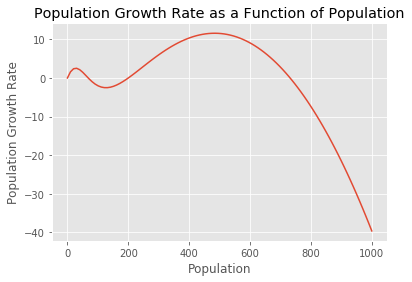

In [ ]:
fig, ax = plt.subplots()

R = 0.2
K = 1000
C = 40
Pc = 100

Prange = np.linspace(0, 1000, 100)

f = lambda t, P: R*(1-P/K)*P-C*P**2/(P**2+Pc**2)

ax.plot(Prange, f(0, Prange))

ax.set_xlabel('Population')
ax.set_ylabel('Population Growth Rate')
ax.set_title('Population Growth Rate as a Function of Population')

In [ ]:
R = 0.2
K = 1000
C = 40
Pc = 100

Prange = np.linspace(0, 1000, 100)

f = lambda P: R*(1-P/K)*P-C*P**2/(P**2+Pc**2)

guesses = [0, 80, 200, 700]
zeros = newton(f, guesses)
print(zeros)

[  0.          68.33752096 200.         731.66247904]


Text(0.5, 1.0, 'Initial Condition Comparison')

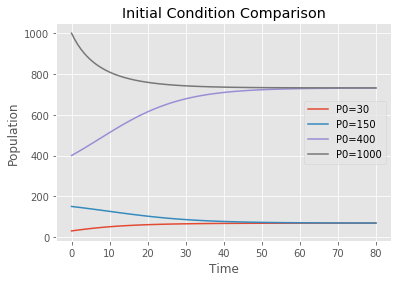

In [ ]:
R=0.2
K=1e3
C=40
Pc=100
f = lambda t, P: R*(1-P/K)*P-C*(P**2/(Pc**2+P**2))

def run_solver(P0, final_time_normalized, Nsteps=100, solver='RK4'):
  Tnum, Snum = dynamics_solve(f, D=1, t_0=0.0, s_0=P0, h=1/(Pc/C*Nsteps)*final_time_normalized, N=Nsteps, method=solver)
  return Tnum,Snum

fig, ax =plt.subplots()

four_cases=[30,150,400,1000]

for i in four_cases:
  Tnum,Snum= run_solver(i, 200)
  ax.plot(Tnum, Snum)
ax.legend(["P0=30","P0=150","P0=400","P0=1000"])
ax.set_xlabel("Time")
ax.set_ylabel("Population")
ax.set_title('Initial Condition Comparison')

2. See code cell below.

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


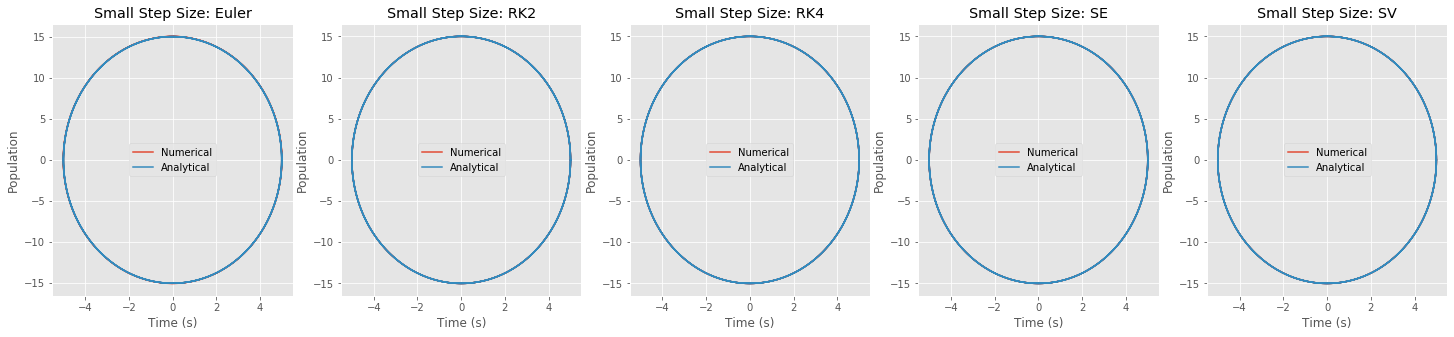

In [ ]:
m=1.0
w=3.0

d_pH= lambda q, p : p/m 
d_qH= lambda q, p : m*w**2*q

def compare_to_analytic(q_0, p_0, final_time_normalized, Nsteps, solver):
  Tnum, Qnum, Pnum = hamiltonian_solve(d_qH, d_pH, q_0=q_0,p_0=p_0, t_0 = 0.0, h = final_time_normalized*2*np.pi/(w*Nsteps), N=Nsteps,method = solver)
  Qanalytic =  q_0*np.cos(w*Tnum)+(p_0/(m*w))*np.sin(w*Tnum)
  Panalytic= p_0*np.cos(w*Tnum) -m*w*q_0*np.sin(w*Tnum)
  return Tnum, Qnum, Pnum, Qanalytic, Panalytic
    

Tnum, Qnum,Pnum, Qanalytic, Panalytic  = [], [], [],[],[]

for i, method in enumerate(['Euler', 'RK2', 'RK4','SE','SV']):
  T, Qn, Pn,Qa, Pa = compare_to_analytic(5, 0, 3, 100000, method)
  Tnum.append(T)
  Qnum.append(Qn)
  Pnum.append(Pn)
  Qanalytic.append(Qa)
  Panalytic.append(Pa)

fig, ax = plt.subplots(1, 5, figsize=(25, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for i, this_ax in enumerate(ax):
  this_ax.plot(Qnum[i], Pnum[i])
  this_ax.plot(Qanalytic[i], Panalytic[i])
  this_ax.set_title(['Small Step Size: Euler', 'Small Step Size: RK2', 'Small Step Size: RK4', 'Small Step Size: SE','Small Step Size: SV'][i])
  this_ax.set_xlabel('Time (s)')
  this_ax.set_ylabel('Population')
  this_ax.legend(['Numerical','Analytical'])

0.08377580409572781
2000
0.08377580409572781
2000
0.08377580409572781
2000
0.08377580409572781
2000
0.08377580409572781
2000


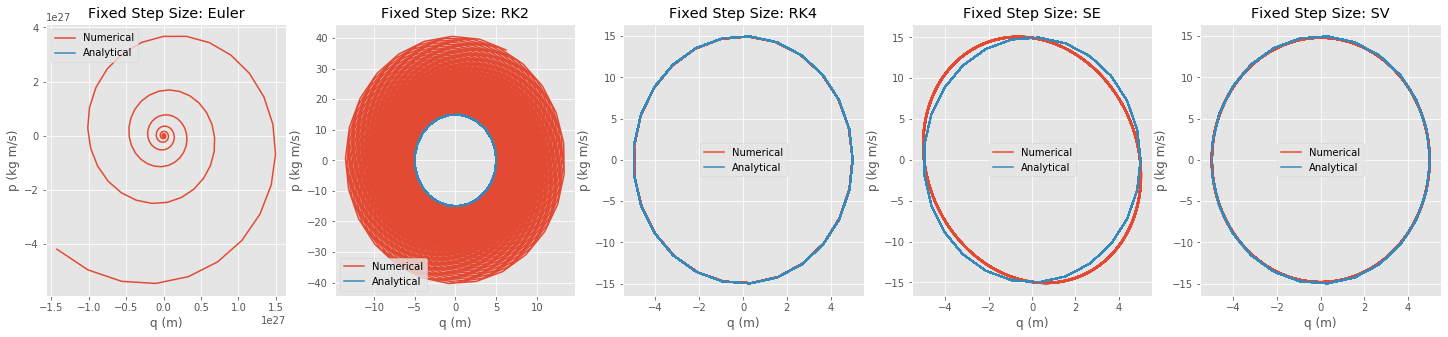

In [ ]:
m=1.0
w=3.0

d_pH= lambda q, p : p/m 
d_qH= lambda q, p : m*w**2*q

def compare_to_analytic(q_0, p_0, final_time_normalized, Nsteps, solver):
  print(final_time_normalized*2*np.pi/(w*Nsteps))
  print(Nsteps)
  Tnum, Qnum, Pnum = hamiltonian_solve(d_qH, d_pH, q_0=q_0,p_0=p_0, t_0 = 0.0, h = final_time_normalized*2*np.pi/(w*Nsteps), N=Nsteps,method = solver)
  Qanalytic =  q_0*np.cos(w*Tnum)+(p_0/(m*w))*np.sin(w*Tnum)
  Panalytic= p_0*np.cos(w*Tnum) -m*w*q_0*np.sin(w*Tnum)
  return Tnum, Qnum, Pnum, Qanalytic, Panalytic
    

Tnum, Qnum,Pnum, Qanalytic, Panalytic  = [], [], [],[],[]

for i, method in enumerate(['Euler', 'RK2', 'RK4', 'SE','SV']):
  T, Qn, Pn,Qa, Pa = compare_to_analytic(5, 0, 80, 2000, method)
  Tnum.append(T)
  Qnum.append(Qn)
  Pnum.append(Pn)
  Qanalytic.append(Qa)
  Panalytic.append(Pa)

fig, ax = plt.subplots(1, 5, figsize=(25, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

for i, this_ax in enumerate(ax):
  this_ax.plot(Qnum[i], Pnum[i])
  this_ax.plot(Qanalytic[i], Panalytic[i])
  this_ax.set_title(['Fixed Step Size: Euler', 'Fixed Step Size: RK2', 'Fixed Step Size: RK4','Fixed Step Size: SE','Fixed Step Size: SV'][i])
  this_ax.set_xlabel('q (m)')
  this_ax.set_ylabel('p (kg m/s)')
  this_ax.legend(['Numerical','Analytical'])

By increasing the step size dramatically we see that the analytic and numerical solutions deviate severly from eachother, however, this is seen to a greater extent with Euler's method (RK1) and RK2. RK4 and the sympletic methods are better. However, you can see RK4's numerical and analytical method deviating from eachother.

In [ ]:
m=1.0
w=3.0

d_pH= lambda q, p : p/m 
d_qH= lambda q, p : m*w**2*q

def compare_to_analytic(q_0, p_0, final_time_normalized, Nsteps, solver):
  Tnum, Qnum, Pnum = hamiltonian_solve(d_qH, d_pH, q_0=q_0,p_0=p_0, t_0 = 0.0, h = final_time_normalized*2*np.pi/(w*Nsteps), N=Nsteps,method = solver)
  Qanalytic =  q_0*np.cos(w*Tnum)+(p_0/(m*w))*np.sin(w*Tnum)
  Panalytic= p_0*np.cos(w*Tnum) -m*w*q_0*np.sin(w*Tnum)
  return Tnum, Qnum, Pnum, Qanalytic, Panalytic
    

Tnum, Qnum,Pnum, Qanalytic, Panalytic  = [], [], [],[],[]

for i, method in enumerate(['Euler', 'RK2', 'RK4', 'SE','SV']):
  T, Qn, Pn,Qa, Pa = compare_to_analytic(5, 0, 10, 1000, method)
  Tnum.append(T)
  Qnum.append(Qn)
  Pnum.append(Pn)
  Qanalytic.append(Qa)
  Panalytic.append(Pa)

fig, ax = plt.subplots(1, 5, figsize=(25, 5))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for i, this_ax in enumerate(ax):
  this_ax.plot(Tnum[i], Pnum[i]**2/(2*m)+0.5*m*w**2*Qnum[i]**2)
  this_ax.set_title(['Energy Conservation: Euler', 'Energy Conservation: RK2', 'Energy Conservation: RK4','Energy Conservation: SE','Energy Conservation: SV'][i],pad=20)
  this_ax.set_xlabel('Time (s)')
  this_ax.set_ylabel('Energy (J)')
  this_ax.legend(['Numerical','Analytical'])

From class, we know that by using Euler's method the  Hamiltonian at step n+1 is generated by multiplying the Hamiltonian at step n by a number greater than 1. Therefore, we expect the behavior of the graph seen above for Euler's methods. For RK2 and RK4 the total energy of the system does not change that dramatically. We also see the expected behavior of total energy of the system being conserved for the sympletic methods. 

# Analysis of Physical System

We will explore here a Hamiltonian of the form 
$$ H(x,y,p_x,p_y) = \frac{1}{2\mu}(p_x^2+p_y^2)-\frac{k}{\sqrt{x^2+y^2}}$$
ie the Hamiltonian of a two-body central force problem with reduced mass $\mu$ and strength k. The derivatives we must give to the numerical solver are then 
$$ \frac{\partial H}{\partial x} = \frac{kx}{(x^2+y^2)^{3/2}} \hspace{1cm} \frac{\partial H}{\partial y} = \frac{ky}{(x^2+y^2)^{3/2}}$$
$$ \frac{\partial H}{\partial p_x} = \frac{p_x}{\mu}\hspace{1cm}\frac{\partial H}{\partial p_y} = \frac{p_y}{\mu} $$
In all of the following tests, we will take as initial coordinates $(x_0,y_0,p_{x0},p_{y0})=(2,0,0,1)$ and $k=3$. In order to ensure that we are simulating enough of the relevant dynamics, we will define all final simulation times with respect to the period of an orbit which is circular with radius equal to our starting x-coordinate, ie for an Earth-Sun like system where one mass is much smaller than the other ($m$ being the smaller mass),
$$ T = 2\pi\sqrt{m\frac{(x_0^2+y_0^2)^{3/2}}{k}}$$ 
where $k=GMm$. For the purposes of the normalization we'll take $m=1$. 

## Step Size Determination
We chose h to be as small as necessary to capture the relevant dynamics by increasing Nsteps while also fixing the final time to 3 times the effective circular period described above. We did this because the more we decreased h, the better our solution became. Once the number of steps reached roughly 200000, there were no more noticeable changes to the dynamics with step size and we further increased it to 300000 to be safe. 

In [ ]:
x0 = 2
y0 = 0
px0 = 0
py0 = 1
m=2
k=3
w = np.sqrt((x0**2+y0**2)**(3/2)/k)**(-1)

d_pH = lambda q,p: np.array([p[0]/m, p[1]/m])
d_qH = lambda q,p: np.array([k*q[0]/(q[0]**2+q[1]**2)**(1.5),k*q[1]/(q[0]**2+q[1]**2)**(1.5)])

def compare_to_analytic(q_0, p_0, final_time_normalized, Nsteps, solver):
  Tnum, Qnum, Pnum = hamiltonian_solve(d_qH, d_pH, q_0=q_0,p_0=p_0, t_0 = 0.0, h = final_time_normalized*2*np.pi/(w*Nsteps), N=Nsteps,method = "SV",d=2)
  return Tnum, Qnum, Pnum


## Verification of Kepler's Laws
1. Kepler's $1^{st}$ law states that planetary orbits are elliptical with the sun at one focus. In particular, this law is true of orbits which have an initial hamiltonian value which less than the effective potential at $r=\infty$ becase this leads to bound orbits. Thus we first ensured that we are working with a negative-energy system. Furthermore, the sun being at one focus is simply a statement that the center of mass of any planet-sun system is generally at the sun because of the large mass disparity between the two bodies. For our purposes this part of the law means that the elliptical orbit has a focus at (0,0), the point around which the central potential is centered. To demonstrate this law we have simulated a body orbiting with reduced mass $\mu=2$ with other parameters as described above. We then computed the semimajor and semiminor axes lengths, a and b respectively, and from them got the focal length $c=\sqrt{a^2+b^2}$. The plot in the first coding cell below demonstrates that the orbit is indeed elliptical, and furthermore one of the focii lands precisely at (0,0) as the first law predicts.
2. Kepler's $2^{nd}$ law states that the areas swept per unit time is constant along the orbit. This law in fact can be derived by forcing the magnitude of the system's angular momentum to be constant. Because the system's motion is confined to the xy plane, the angular momentum has only a z-component whose magnitude can be written (see Marion/Thornton for example)
$$ J_z = \mu r^2\dot{\phi}$$
where r is the distance to the center, $\mu$ is the reduced mass, and $\phi$ is the angle swept out by the orbit. By rearranging this we can write
$$ \frac{J_z}{2\mu} = \frac{1}{2}r^2\dot{\phi}=\frac{dA}{dt}$$
where A is the area swept out by the orbit at time t.
We proved this by plotting the magnitude of the angular momentum $\vec{J}=\vec{q}$ x $\vec{p}$ and show that this is constant across time. From the second plot below, we can see that $\vec{J}$ does not really change for all times. Therefore, it is Kepler's $2^{nd}$  law that is equivalent to showing conservation of angular momentum. 
3. Kepler's $3^{rd}$ law states that $T$ is proportional to $a^{3/2}$, where $a$ is the semi-major axis and $T$ is the period of orbit. To demonstrate this scaling we vary the strength parameter k, recording T and a for each case and finally plot $\log(a/x_0)$ against $\log(T/(2\pi\sqrt{x_0^3/k}))$ with $k=3$, with the normalizations included such that we take logarithms of dimensionless quantities. We have chosen initial conditions such that the elliptical orbit is not an a nonzero angle with the x-axis, so the period can be determined by finding when the x-coordinate reaches its first inflection point and doubling the corresponding time. A linear fit to the log-log data indeed shows that the slope is 1.5 and the r-value is 1. 


In [ ]:
print(f'Total Energy: {(px0**2+py0**2)/(2*m)-k/(x0**2+y0**2)**(1/2)} J')

Tnum,Qnum, Pnum=compare_to_analytic([x0, y0], [px0, py0],3,300000,"SV")

a = (Qnum[:,0].max()-Qnum[:,0].min())/2
b = (Qnum[:,1].max()-Qnum[:,1].min())/2
c = np.sqrt(max([a**2-b**2, -a**2+b**2]))

xcenter = (Qnum[:,0].max()+Qnum[:,0].min())/2

fig, ax = plt.subplots()

ax.plot(Qnum[:,0], Qnum[:,1])
ax.plot([xcenter], [0], 'b.')
ax.plot([xcenter-c, xcenter+c], [0, 0], 'g.')
ax.set_xlabel(r'$q_x$ (m)')
ax.set_ylabel(r'$q_y$ (m)')
ax.set_title(r'Keplers $1^{st}$ Law: Orbits are elliptical')
ax.legend(['Orbit', 'Center', 'Focii'], loc=4)

In [ ]:
Tnum, Qnum, Pnum=compare_to_analytic([x0, y0],[px0, py0],3,300000,"SV")

J = Qnum[:,0]*Pnum[:,1]-Qnum[:,1]*Pnum[:,0]

fig, ax = plt.subplots()

ax.plot(Tnum,J)
ax.set_ylim(1.5,2.5)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Angular Momentum $J_z$ $(kg$ $m^{2}/s)$')
ax.set_title(r'Keplers $2^{nd}$ Law: Area swept per unit time is constant i.e. Angular momentum is conserved',pad=20)

In [ ]:
def get_ellipse_parameters(x0):
  w = np.sqrt((x0**2+y0**2)**(3/2)/k)**(-1)

  d_pH = lambda q,p: np.array([p[0]/m, p[1]/m])
  d_qH = lambda q,p: np.array([k*q[0]/(q[0]**2+q[1]**2)**(1.5),k*q[1]/(q[0]**2+q[1]**2)**(1.5)])

  def compare_to_analytic(q_0, p_0, final_time_normalized, Nsteps, solver):
    Tnum, Qnum, Pnum = hamiltonian_solve(d_qH, d_pH, q_0=q_0,p_0=p_0, t_0 = 0.0, h = final_time_normalized*2*np.pi/(w*Nsteps), N=Nsteps,method = "SV",d=2)
    return Tnum, Qnum, Pnum

  Tnum, Qnum, Pnum=compare_to_analytic([x0, y0],[px0, py0],6,400000,"SV")
  
  a = (Qnum[:,0].max()-Qnum[:,0].min())/2
  b = (Qnum[:,1].max()-Qnum[:,1].min())/2
  center = (Qnum[:,0].max()+Qnum[:,0].min())/2

  semimajor = max([a, b])

  ### to evaluate the period ###
  idx = np.array([False]+[Qnum[:,0][i]>Qnum[:,0][i-1] for i in range(1, len(Qnum[:,0]))])
  period = 2*Tnum[idx][0]

  return semimajor, period

avals = []
tvals = []
for x0val in np.linspace(0.5, 8, 10):
  a, t = get_ellipse_parameters(x0val)
  avals.append(a)
  tvals.append(t)

avals = np.array(avals)
tvals = np.array(tvals)

slope = stats.linregress(np.log(avals/x0), np.log(tvals/(2*np.pi*np.sqrt(x0**3/k))))

fig, ax = plt.subplots()

x0 = 2
k = 3
ax.plot(np.log(avals/x0), np.log(tvals/(2*np.pi*np.sqrt(x0**3/k))))
ax.legend([f'Log-Log Slope: {slope.slope:.3f}\nFit r-value: {slope.rvalue:.7f}'])
ax.set_xlabel('Log of Semimajor Axis Normalized to $x_0$')
ax.set_ylabel('Log of Period Normalized to $2\pi\sqrt{x_0^3/k}$')
ax.set_title("Kepler's 3$^{rd}$ Law: Determination of Period Scaling with Semimajor Axis")
#a=r_max+r_min/2

## Verification of Conserved Quantities 

1. The first quantity we expect to conserve is angular momentum, which in this case has only a z-component as described above. The verification of the conservation of angular momentum was used to test Kepler's 2nd Law already. 

2. The second quantity we should conserve is energy, in particular since we are using a symplectic integrator with the Stormer-Verlet method. The total energy in this case is just the Hamiltonian. 

3. The final quantity to be conserved is the Laplace-Runge-Lenz vector, which has x and y components
$$A_x = p_yJ-\mu k\frac{x}{\sqrt{x^2+y^2}}\hspace{1cm} A_y = -p_xJ-\mu k\frac{y}{\sqrt{x^2+y^2}}$$


In [ ]:
x0 = 2
y0 = 0
px0 = 0
py0 = 1
m=2
k=3
w = np.sqrt((x0**2+y0**2)**(3/2)/k)**(-1)

d_pH = lambda q,p: np.array([p[0]/m, p[1]/m])
d_qH = lambda q,p: np.array([k*q[0]/(q[0]**2+q[1]**2)**(1.5),k*q[1]/(q[0]**2+q[1]**2)**(1.5)])

def compare_to_analytic(q_0, p_0, final_time_normalized, Nsteps, solver):
  Tnum, Qnum, Pnum = hamiltonian_solve(d_qH, d_pH, q_0=q_0,p_0=p_0, t_0 = 0.0, h = final_time_normalized*2*np.pi/(w*Nsteps), N=Nsteps,method = "SV",d=2)
  return Tnum, Qnum, Pnum

Tnum, Qnum, Pnum=compare_to_analytic([x0, y0],[px0, py0],3,300000,"SV")

E = 1/(2*m)*(Pnum[:,0]**2+Pnum[:,1]**2) - k/np.sqrt(Qnum[:,0]**2+Qnum[:,1]**2)

fig, ax = plt.subplots()

ax.plot(Tnum,E)
ax.set_ylim(-1.75, -0.75)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Total Enery E $(J)$')
ax.set_title(r'Conservation of Total Energy',pad=20)

In [ ]:
Tnum, Qnum, Pnum=compare_to_analytic([x0, y0],[px0, py0],3,300000,"SV")

E = 1/(2*m)*(Pnum[:,0]**2+Pnum[:,1]**2) - k/np.sqrt(Qnum[:,0]**2+Qnum[:,1]**2)
J = Qnum[:,0]*Pnum[:,1]-Qnum[:,1]*Pnum[:,0]
R = np.sqrt(Qnum[:,0]**2+Qnum[:,1]**2)

Ax = Pnum[:,1]*J-m*k*Qnum[:,0]/R
Ay = -Pnum[:,0]*J-m*k*Qnum[:,1]/R

fig, ax = plt.subplots()

ax.plot(Tnum,Ax)
ax.plot(Tnum, Ay)
#ax.set_ylim(-1.75, -0.75)
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'Laplace-Runge-Lens Vector $(kg^2$ $m^3/s^2)$')
ax.set_title(r'Conservation of Laplace-Runge-Lenz Vector',pad=20)
ax.legend(['Ax', 'Ay'])


## Application to Simulation of Earth's Orbit

We retrieved information about the Earth's orbit and the physical properties of the Earth and Sun from NASA's fact sheets (Sun: https://web.archive.org/web/20100715200549/http://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html Earth: https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html). We then plugged these into the relevant parameters and simulated 10,000 periods of the motion. We plotted the trajectory over this time and also computed the period of the orbit from the data, finding it to be almost exactly one year to within 0.1%. 

In [ ]:
ms = 1989100e24
me = 5.9723e24
k = 6.67408e-11 * ms * me
x0 = (ms+me)/ms * 152.1e9
py0 = 29.29e3 * (ms*me/(me+ms))
y0 = 0
px0 = 0 
w = np.sqrt(me*(x0**2+y0**2)**(3/2)/k)**(-1)

m = ms*me/(ms+me)

d_pH = lambda q,p: np.array([p[0]/m, p[1]/m])
d_qH = lambda q,p: np.array([k*q[0]/(q[0]**2+q[1]**2)**(1.5),k*q[1]/(q[0]**2+q[1]**2)**(1.5)])

def compare_to_analytic(q_0, p_0, final_time_normalized, Nsteps, solver):
  Tnum, Qnum, Pnum = hamiltonian_solve(d_qH, d_pH, q_0=q_0,p_0=p_0, t_0 = 0.0, h = final_time_normalized*2*np.pi/(w*Nsteps), N=Nsteps,method = "SV",d=2)
  return Tnum, Qnum, Pnum

Tnum, Qnum, Pnum=compare_to_analytic([x0, y0],[px0, py0],10000,30000000,"SV")

a = (Qnum[:,0].max()-Qnum[:,0].min())/2
b = (Qnum[:,1].max()-Qnum[:,1].min())/2
center = (Qnum[:,0].max()+Qnum[:,0].min())/2

semimajor = max([a, b])

### to evaluate the period ###
idx = np.array([False]+[Qnum[:,0][i]>Qnum[:,0][i-1] for i in range(1, len(Qnum[:,0]))])
period = 2*Tnum[idx][0]

print(f'Period: {period/(3600*24*365.25):.3f} years')

fig, ax = plt.subplots()
ax.plot(Qnum[:,0]/1000, Qnum[:,1]/1000)
ax.set_xlabel('x (km)')
ax.set_ylabel('y (km)')
ax.set_title('Earth Orbit for 10,000 Periods')